# San Francisco Crime Data Analysis and Visualization

Dataset: https://www.kaggle.com/c/sf-crime

Wanruo Zhang

In [ ]:
# import modules 
import collections

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium # for map visualization
from folium import plugins

In [2]:
df = pd.read_csv('train.csv', parse_dates=['Dates'])

In [3]:
df.groupby(['Address']).Resolution.count().shape

(23228,)

In [4]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df['Year'] = df['Dates'].apply(lambda x: x.year)
df['Week'] = df['Dates'].apply(lambda x: x.week)
df['Hour'] = df['Dates'].apply(lambda x: x.hour)

In [7]:
df['Minute'] = df['Dates'].apply(lambda x: x.minute)

In [93]:
df['dayofweek'] = df['Dates'].apply(lambda x: x.weekday)

In [8]:
df['Month'] = df['Dates'].apply(lambda x: x.month)

In [9]:
sns.set()

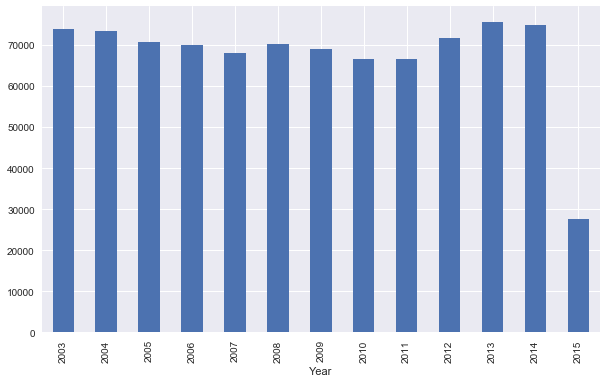

In [10]:
df.groupby(['Year']).Year.count().plot(kind='bar', figsize=(10, 6), sort_columns=True)
plt.show()

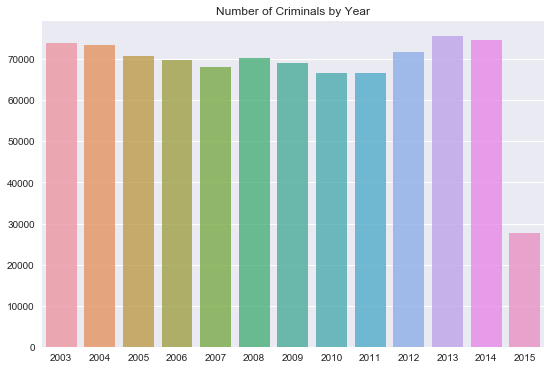

In [72]:
year_count = df['Year'].value_counts()
plt.figure(figsize=(9,6))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Number of Criminals by Year')
plt.savefig("num-crime-year.png") # save as png

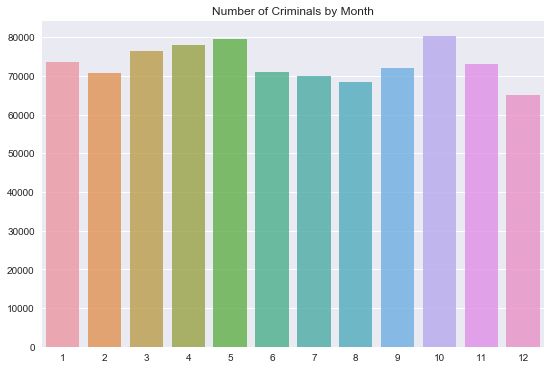

In [75]:
month_count = df['Month'].value_counts()
plt.figure(figsize=(9,6))
sns.barplot(month_count.index, month_count.values, alpha=0.8)
plt.title('Number of Criminals by Month')
plt.savefig("num-crime-month.png") # save as png

In [100]:
df['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [109]:
weekday_count = df['DayOfWeek'].value_counts()
weekday_count = weekday_count.reindex(index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

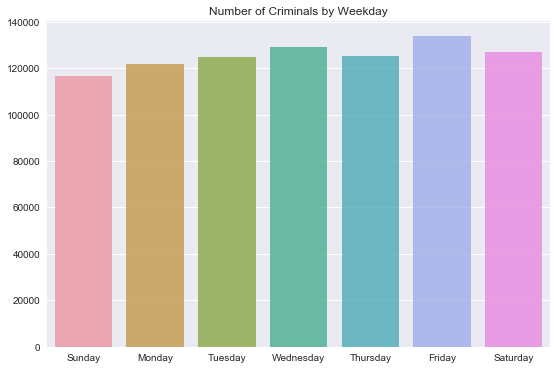

In [110]:
plt.figure(figsize=(9,6))
sns.barplot(weekday_count.index, weekday_count.values, alpha=0.8)
plt.title('Number of Criminals by Weekday')
plt.savefig("num-crime-weekday.png") # save as png

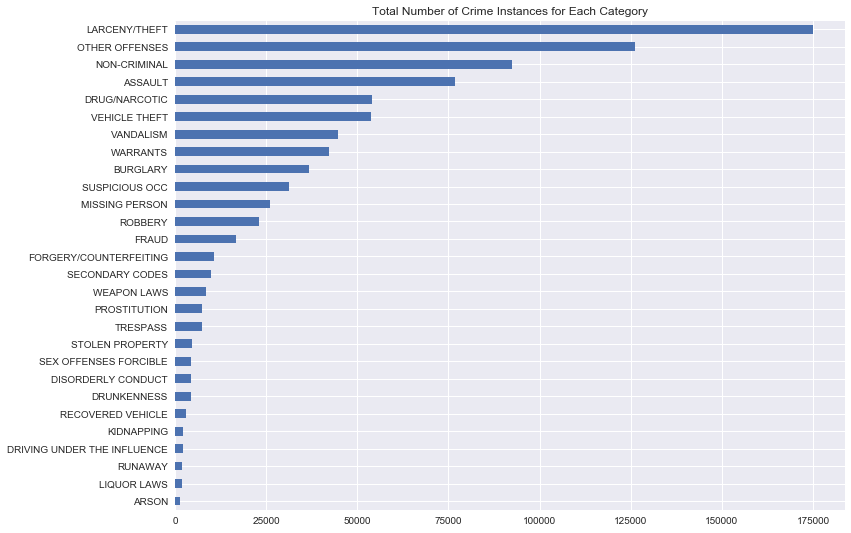

In [69]:

s = df.Category
counts = s.value_counts()
ax = counts.iloc[:28].plot(kind="barh",  figsize=(12, 9), sort_columns=True)
ax.invert_yaxis()
plt.title('Total Number of Crime Instances for Each Category')
# df.groupby(['Category']).Category.count().plot(kind='barh', figsize=(12, 9), sort_columns=True)
plt.show()

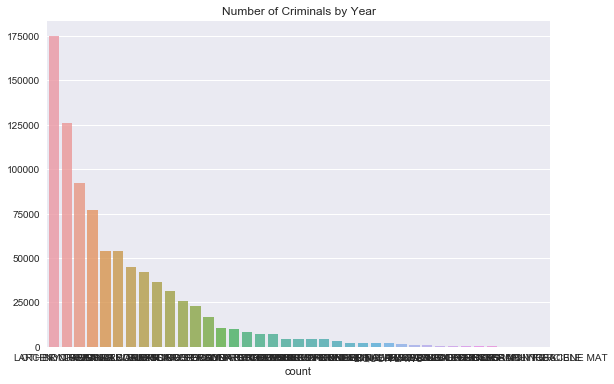

In [44]:
cat_count = df['Category'].value_counts()
plt.figure(figsize=(9,6))
ax = sns.barplot(cat_count.index, cat_count.values, alpha=0.8)
plt.title('Number of Criminals by Year')
plt.show()

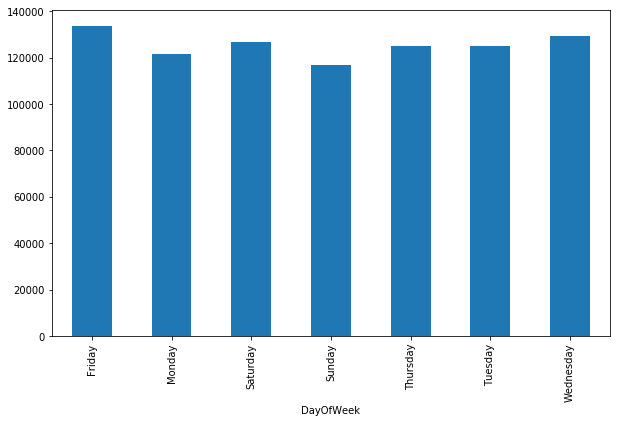

In [11]:
df.groupby(['DayOfWeek']).DayOfWeek.count().plot(kind='bar', figsize=(10, 6))
plt.show()

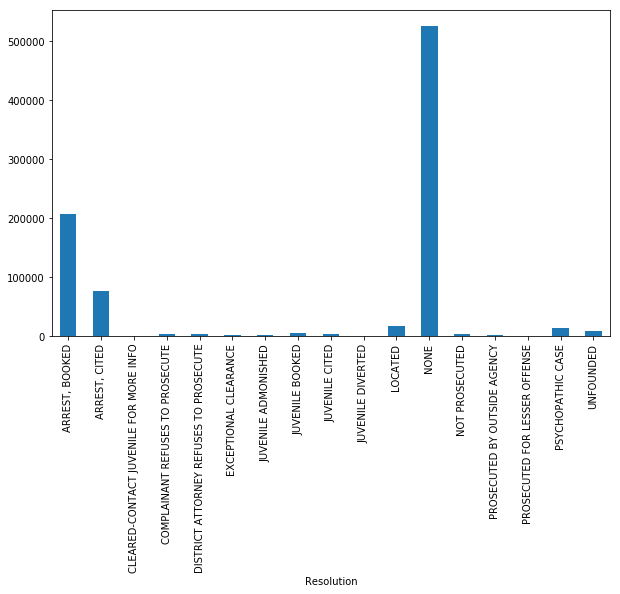

In [12]:
df.groupby(['Resolution']).Resolution.count().plot(kind='bar', figsize=(10, 6))
plt.show()

In [13]:
df.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [14]:
main_crimes = ['OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ASSAULT', 'BURGLARY', 'DRUNKENNESS', 
        'WARRANTS']

In [15]:
df['main'] = df.Category.apply(lambda x: x in main_crimes)
df_main = df[df.main == True]

In [16]:
df_main.shape

(652017, 15)

In [17]:
df_main.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Week,Hour,Minute,Month,main
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23,53,5,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23,53,5,True
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,20,23,33,5,True
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,20,23,30,5,True
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,20,23,30,5,True


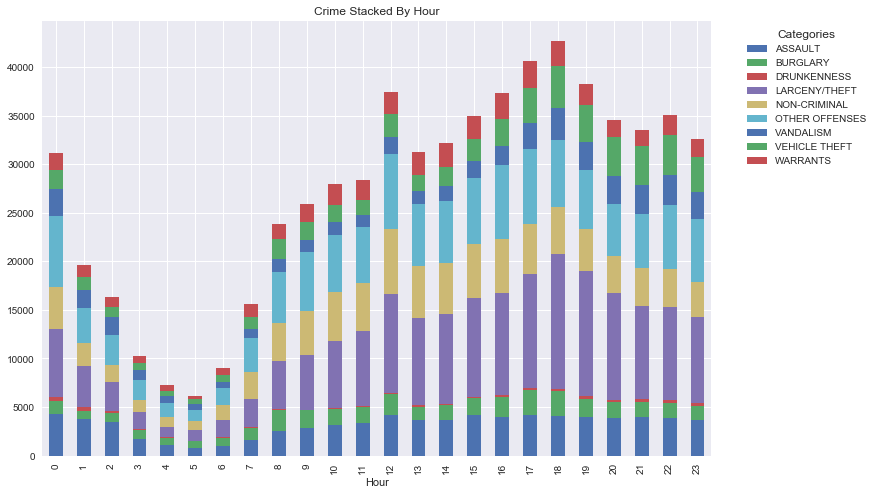

In [68]:
df_temp = pd.crosstab(df_main.Hour, df_main.Category)
df_temp.plot.bar(stacked=True, figsize=(12,8))
lgd = plt.legend(title='Categories', bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Crime Stacked By Hour')
# plt.show()
plt.savefig("crime-hour.png", bbox_extra_artists=(lgd,), bbox_inches='tight') # save as png

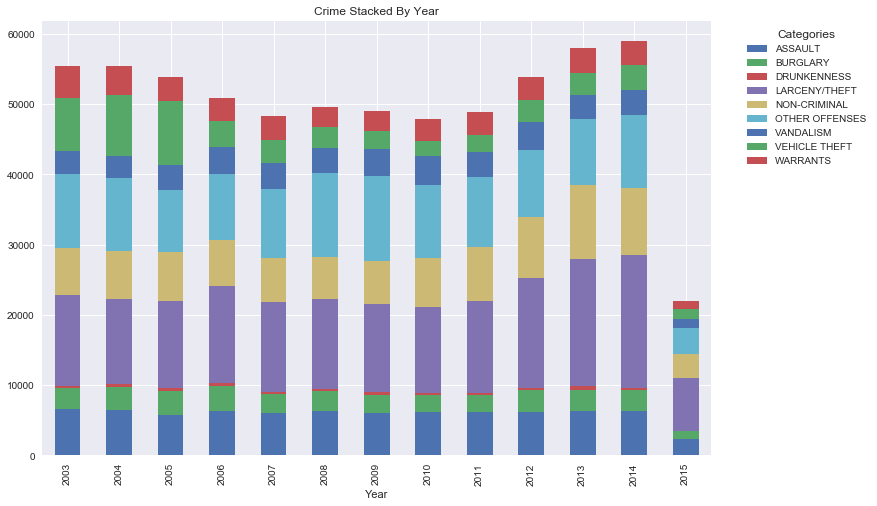

In [52]:
df_main2 = df_main[df_main.Year < 2015]
df_temp = pd.crosstab(df_main.Year, df_main.Category)
df_temp.plot.bar(stacked=True, figsize=(12,8))
plt.legend(title='Categories', bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Crime Stacked By Year')
# plt.show()
plt.savefig("crime-year.png") # save as png

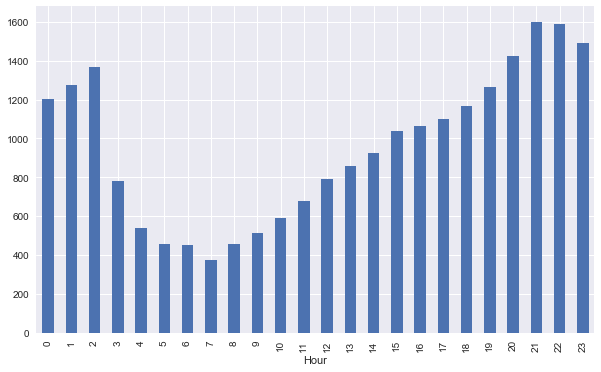

In [37]:
df[(df.Category == 'ROBBERY')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

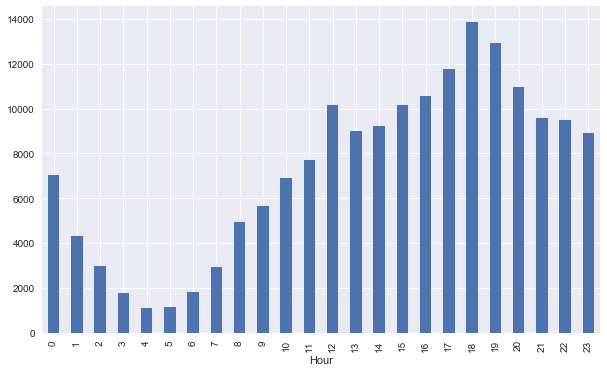

In [38]:
df[(df.Category == 'LARCENY/THEFT')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

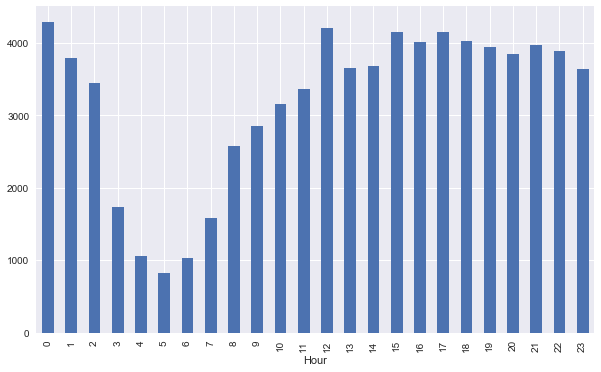

In [39]:
df[(df.Category == 'ASSAULT')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

### Maps

Maps for each categories

In [91]:
print '                                HeatMap for "LARCENY/THEFT" crimes'
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & (df.Category == 'LARCENY/THEFT')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]

crimes = np.concatenate([crimes, np.ones((n, 1))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=13))

                                HeatMap for "LARCENY/THEFT" crimes


In [92]:
print '                                HeatMap for "ASSAULT" crimes'
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & (df.Category == 'ASSAULT')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=13))

                                HeatMap for "ASSAULT" crimes


In [90]:
print '                                HeatMap for "DRUG/NARCOTIC" crimes'
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & (df.Category == 'DRUG/NARCOTIC')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=13))

                                HeatMap for "DRUG/NARCOTIC" crimes


In [89]:
print '                                HeatMap for "VEHICLE THEFT" crimes'
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & (df.Category == 'VEHICLE THEFT')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=13))

                                HeatMap for "VEHICLE THEFT" crimes


In [21]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2015) & ((df.Hour >= 8) & (df.Hour <= 12))]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * ((5000.0 / n))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=11))

In [22]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2015) & ((df.Hour > 12) & (df.Hour <= 18))]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * ((5000.0 / n))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=11))

### Use to generate image, instead of html

In [21]:
# use selenium webdrivers to get shortcuts
import os
import time
from selenium import webdriver

delay=5
fn='testmap.html'
tmpurl='{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)
browser = webdriver.Firefox()
browser.get('file://' + tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')
browser.quit()

In [38]:
# only select felony
df_selected = df[(df.Category == 'LARCENY/THEFT') | (df.Category == 'ASSAULT') | (df.Category == 'VEHICLE THEFT') |
                 (df.Category == 'DRUG/NARCOTIC')]

In [39]:
df_selected.Category.unique()

array(['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT', 'DRUG/NARCOTIC'], dtype=object)

In [42]:
# # start the browser
# browser = webdriver.Firefox()

# for i in range(48):
    
#     h = i / 2
#     print h
#     print i % 2
#     if i % 2 == 0:
#         df_temp = df_selected[(df.Year == 2014) & ((df.Hour == h) & (df.Minute < 30))]
#     else:
#         df_temp = df_selected[(df.Year == 2014) & ((df.Hour == h) & (df.Minute >= 30))]
        
#     m = folium.Map(
#         location=[37.774599, -122.425892],
#         zoom_start=12,
#         tiles='Stamen Terrain'
#     )

#     cols_to_pull = ['Y', 'X']
#     crimes = df_temp.dropna(axis = 0)[cols_to_pull].as_matrix()
#     n = crimes.shape[0]
#     crimes = np.concatenate([crimes, np.ones((n, 1)) * (10000.0 / n)], axis = 1).tolist()
#     m.add_child(plugins.HeatMap(crimes, radius=12))
#     # save the html
#     delay=5
#     fn='testmap%d.html'% (i)
#     tmpurl='{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
#     m.save(fn)
#     # save the png    
#     browser.get('file://' + tmpurl)
#     #Give the map tiles some time to load
#     time.sleep(delay)
#     browser.save_screenshot('map%d.png' % (i))
    
# browser.quit()

In [1]:
# start the browser
browser = webdriver.Firefox()

for i in range(144 - 2):
    
    h = i / 6
    print 'hour', h
    print 'number', i % 6
    if i % 6 == 0:
        df_temp = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h) & (df.Minute < 30))]
    elif i % 6 == 1:
        df_temp = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h) & (df.Minute >= 10) & (df.Minute < 40))]
    elif i % 6 == 2:
        df_temp = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h) & (df.Minute >= 20) & (df.Minute < 50))]
    elif i % 6 == 3:
        df_temp = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h) & (df.Minute >= 30))]
    elif i % 6 == 4:
        df_temp1 = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h + 1) & (df.Minute >= 40))]                                     
        df_temp2 = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h + 1) & (df.Minute < 10))]
        df_temp = pd.concat([df_temp1, df_temp2], axis=0)
    else:
        df_temp1 = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h + 1) & (df.Minute >= 50))]                                     
        df_temp2 = df_selected[((df.Year <= 2014) & (df.Year >= 2012)) & ((df.Hour == h + 1) & (df.Minute < 20))]
        df_temp = pd.concat([df_temp1, df_temp2], axis=0)
        
    m = folium.Map(
        location=[37.774599, -122.425892],
        zoom_start=12,
        tiles='Stamen Terrain'
    )

    cols_to_pull = ['Y', 'X']
    crimes = df_temp.dropna(axis = 0)[cols_to_pull].as_matrix()
    n = crimes.shape[0]
    # if normalize
    # crimes = np.concatenate([crimes, np.ones((n, 1)) * (10000.0 / n)], axis = 1).tolist()
    # not normalized
    crimes = np.concatenate([crimes, np.ones((n, 1))], axis = 1).tolist()
    m.add_child(plugins.HeatMap(crimes, radius=15))
    # save the html
    delay=5
    fn='testmap%d.html'% (i)
    path = os.getcwd() + '/figures'
    tmpurl='{path}/{mapfile}'.format(path=path,mapfile=fn)
    m.save('figures/' + fn)
    # save the png    
    browser.get('file://' + tmpurl)
    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot('figures/' + 'map%d.png' % (i))
    
browser.quit()

NameError: name 'webdriver' is not defined

### Save the images to Video of moving heatmap

In [123]:
import cv2

In [124]:
fps = 22   #视频帧率
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')  
videoWriter = cv2.VideoWriter('video/heatmap.avi', fourcc, fps, (1440, 1080))   #image size

In [125]:
for i in range(0,144 - 2):
    p2=i
    img12 = cv2.imread('figures/map'+str(p2)+'.png')
    # cut the image
    img12 = img12[200:1080 + 200, 512:512 + 1440]
    # print img12.shape
    cv2.waitKey(1000/int(fps))
    videoWriter.write(img12)
videoWriter.release()

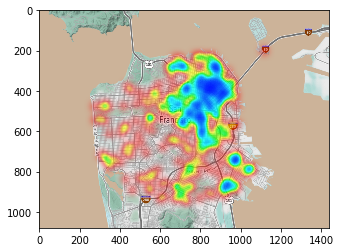

In [109]:
plt.imshow(img12)
plt.show()